## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/BigMart/Train_preprocessed5.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Item_Outlet_Sales,Item_Weight,Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,0,0,8.225808,-0.841872,-1.111358,1.320465,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1,6.096776,-1.641706,-1.045067,-1.806429,-1.790133,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2,7.648868,1.098554,-1.096733,0.235784,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,3,3,6.597664,1.500838,-0.083740,0.715820,0.245406,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,4,6.903451,-0.929428,-0.083740,-1.599856,1.161102,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [ ]:
df.shape

(8523, 42)

In [ ]:
df.columns

Index(['Item_Outlet_Sales', 'Item_Weight', 'Item_Visibility', 'log_Item_MRP',
       'log_Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1', 'Outlet_0',
       'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6',
       'Outlet_7', 'Outlet_8', 'Item_Type_0', 'Item_Type_1', 'Item_Type_2',
       'Item_Type_3', 'Item_Type_4', 'Item_Type_5', 'Item_Type_6',
       'Item_Type_7', 'Item_Type_8', 'Item_Type_9', 'Item_Type_10',
       'Item_Type_11', 'Item_Type_12', 'Item_Type_13', 'Item_Type_14',
       'Type1_Tear1', 'Type1_Tear2'],
      dtype='object')

In [ ]:
df.head()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,8.225808,-0.841872,-1.111358,1.320465,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,6.096776,-1.641706,-1.045067,-1.806429,-1.790133,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,7.648868,1.098554,-1.096733,0.235784,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,6.597664,1.500838,-0.083740,0.715820,0.245406,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,6.903451,-0.929428,-0.083740,-1.599856,1.161102,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# statistical info
df.describe()

,Item_Outlet_Sales,Item_Weight,Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
count,8523.000000,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,7.297863,3.997480e-16,2.167560e-16,-1.418918e-15,-7.653153e-16,0.459697,0.187610,0.109351,0.327702,0.280183,0.326763,0.127068,0.654347,0.108882,0.093746,0.718644,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.076030,0.029450,0.012906,0.076147,0.080019,0.100434,0.144550,0.025109,0.061011,0.106770,0.049865,0.019829,0.007509,0.140795,0.052212,0.218233,0.326763
std,1.015211,1.000059e+00,1.000059e+00,1.000059e+00,1.000059e+00,0.498402,0.390423,0.312098,0.469403,0.449115,0.469057,0.333069,0.475609,0.311509,0.291493,0.449687,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.265061,0.169073,0.112877,0.265249,0.271338,0.300596,0.351667,0.156464,0.239365,0.308839,0.217679,0.139420,0.086334,0.347831,0.222467,0.413071,0.469057
min,3.534854,-1.964716e+00,-1.367266e+00,-2.618305e+00,-1.790133e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.727728,-8.395053e-01,-7.617782e-01,-5.483847e-01,-5.771102e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.492945,0.000000e+00,-1.579196e-01,2.544837e-01,1.324626e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.039898,7.435985e-01,5.000528e-01,7.527045e-01,1.161102e+00,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.479448,2.009608e+00,5.297182e+00,1.447043e+00,1.286157e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Item_Outlet_Sales       8523 non-null   float64
 1   Item_Weight             8523 non-null   float64
 2   Item_Visibility         8523 non-null   float64
 3   log_Item_MRP            8523 non-null   float64
 4   log_Outlet_Years        8523 non-null   float64
 5   Item_Fat_Content_0      8523 non-null   int64  
 6   Item_Fat_Content_1      8523 non-null   int64  
 7   Outlet_Size_0           8523 non-null   int64  
 8   Outlet_Size_1           8523 non-null   int64  
 9   Outlet_Location_Type_0  8523 non-null   int64  
 10  Outlet_Location_Type_1  8523 non-null   int64  
 11  Outlet_Type_0           8523 non-null   int64  
 12  Outlet_Type_1           8523 non-null   int64  
 13  Outlet_Type_2           8523 non-null   int64  
 14  New_Item_Type_0         8523 non-null   

In [ ]:
# check unique values in dataset
df.apply(lambda x: len(x.unique()))

Item_Outlet_Sales         3493
Item_Weight                417
Item_Visibility           7880
log_Item_MRP              5938
log_Outlet_Years             9
Item_Fat_Content_0           2
Item_Fat_Content_1           2
Outlet_Size_0                2
Outlet_Size_1                2
Outlet_Location_Type_0       2
Outlet_Location_Type_1       2
Outlet_Type_0                2
Outlet_Type_1                2
Outlet_Type_2                2
New_Item_Type_0              2
New_Item_Type_1              2
Outlet_0                     2
Outlet_1                     2
Outlet_2                     2
Outlet_3                     2
Outlet_4                     2
Outlet_5                     2
Outlet_6                     2
Outlet_7                     2
Outlet_8                     2
Item_Type_0                  2
Item_Type_1                  2
Item_Type_2                  2
Item_Type_3                  2
Item_Type_4                  2
Item_Type_5                  2
Item_Type_6                  2
Item_Typ

In [ ]:
# df['Item_Outlet_Sales'] = np.expm1(df['Item_Outlet_Sales'])

## Preprocessing the dataset

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'], axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
X.head()

,Item_Weight,Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,-0.841872,-1.111358,1.320465,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.641706,-1.045067,-1.806429,-1.790133,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.098554,-1.096733,0.235784,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.500838,-0.083740,0.715820,0.245406,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.929428,-0.083740,-1.599856,1.161102,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X.columns

Index(['Item_Weight', 'Item_Visibility', 'log_Item_MRP', 'log_Outlet_Years',
       'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0',
       'New_Item_Type_1', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8',
       'Item_Type_0', 'Item_Type_1', 'Item_Type_2', 'Item_Type_3',
       'Item_Type_4', 'Item_Type_5', 'Item_Type_6', 'Item_Type_7',
       'Item_Type_8', 'Item_Type_9', 'Item_Type_10', 'Item_Type_11',
       'Item_Type_12', 'Item_Type_13', 'Item_Type_14', 'Type1_Tear1',
       'Type1_Tear2'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

cont_vars = ['Item_Weight', 'Item_Visibility', 'log_Item_MRP', 'log_Outlet_Years']
cat_vars = ['Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Type_0',
       'Outlet_Type_1', 'Outlet_Type_2', 'New_Item_Type_0', 'New_Item_Type_1',
       'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5',
       'Outlet_6', 'Outlet_7', 'Outlet_8','Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_Type_5',
       'Item_Type_6', 'Item_Type_7', 'Item_Type_8', 'Item_Type_9',
       'Item_Type_10', 'Item_Type_11', 'Item_Type_12', 'Item_Type_13',
       'Item_Type_14','Type1_Tear1',
       'Type1_Tear2']
scaler = StandardScaler()
df_cont = pd.DataFrame(scaler.fit_transform(X[cont_vars]), columns = cont_vars)
X_norm = pd.concat([df_cont, X[cat_vars]], axis=1)

X_norm.head()

,Item_Weight,Item_Visibility,log_Item_MRP,log_Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Size_0,Outlet_Size_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,New_Item_Type_0,New_Item_Type_1,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Type1_Tear1,Type1_Tear2
0,-0.841872,-1.111358,1.320465,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-1.641706,-1.045067,-1.806429,-1.790133,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1.098554,-1.096733,0.235784,0.132463,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1.500838,-0.083740,0.715820,0.245406,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,-0.929428,-0.083740,-1.599856,1.161102,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
X_norm.shape

(8523, 41)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 27)
X_train_pca = pca.fit_transform(X_norm) #정규화된 데이터를 사용
X_train_pca = pd.DataFrame(X_train_pca)


In [ ]:
X_train_pca.shape

(8523, 27)

In [ ]:
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,0.079190,-0.828812,-0.142830,-1.813173,0.577520,-1.087516,0.238511,0.298609,-0.046657,0.265093,0.004870,0.167995,0.001988,-0.135408,-0.084711,0.522980,-0.162215,0.828060,-0.143718,0.093704,0.502311,-0.103931,-0.094445,-0.077860,0.017996,0.017351,0.029044
1,-1.782045,1.868047,-1.629581,-0.367679,1.919287,0.600013,0.176469,0.578733,0.400895,-0.236917,0.158544,0.288665,-0.371730,0.894061,0.503452,-0.105047,0.254444,-0.174981,0.135672,-0.245115,-0.185614,-0.047907,-0.348105,-0.117826,-0.013552,0.008729,0.021016
2,0.129461,-1.475592,-0.726011,0.222143,0.533777,-1.128686,0.192336,0.196615,-0.097661,0.263161,-0.020726,0.071647,0.036458,-0.176573,-0.098153,0.365797,0.007176,-0.013207,0.063387,-0.044069,0.553448,0.963552,0.025846,-0.160342,0.008231,-0.040343,-0.023238
3,0.502724,-1.361233,0.621296,0.782783,0.275776,0.354774,-0.545632,-0.350504,-0.638234,-0.994950,0.740489,-0.216653,0.182403,0.334636,0.207762,-0.587698,-0.176186,0.043023,0.051206,-0.100176,0.528709,-0.107648,0.023641,-0.000017,-0.009029,-0.019180,-0.003241
4,1.151264,1.133777,-1.555862,-0.093770,-0.544584,1.285030,0.630199,-0.309078,1.159591,-0.229243,-0.084254,-0.234643,0.112966,-0.323347,-0.141835,0.093248,0.012819,0.154198,0.171462,-0.408159,-0.046044,0.013341,-0.013434,-0.017779,-0.064312,0.000375,0.002946


## Model Training

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("RMSE:", np.sqrt(mean_squared_error(y,pred)))
    print("CV Score:", cv_score)

Model Report
MSE: 0.2659316522501822
RMSE: 0.515685613770815
CV Score: 0.2677486707071057


<Axes: title={'center': 'Model Coefficients'}>

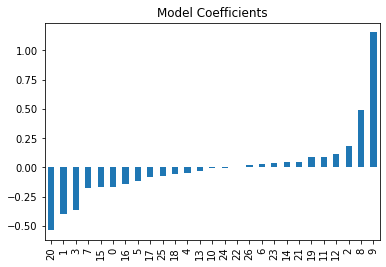

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X_train_pca, y)
coef = pd.Series(model.coef_, X_train_pca.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.26593182957594613
RMSE: 0.515685785702831
CV Score: 0.2677443079008319


<Axes: title={'center': 'Model Coefficients'}>

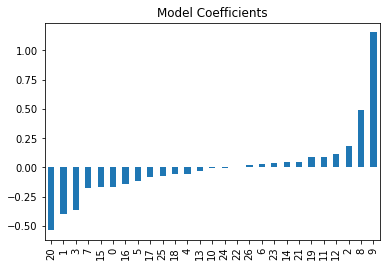

In [ ]:
model = Ridge()
train(model, X_train_pca, y)
coef = pd.Series(model.coef_, X_train_pca.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 1.0305333080087593
RMSE: 1.015151864505385
CV Score: 1.030781898345697


<Axes: title={'center': 'Model Coefficients'}>

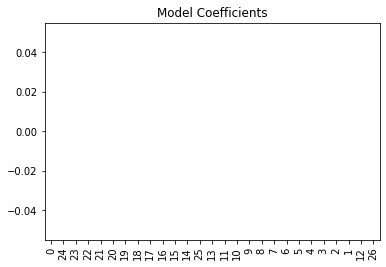

In [ ]:
model = Lasso()
train(model, X_train_pca, y)
coef = pd.Series(model.coef_, X_train_pca.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

Model Report
MSE: 0.0
RMSE: 0.0
CV Score: 0.6024417256056468


<Axes: title={'center': 'Feature Importance'}>

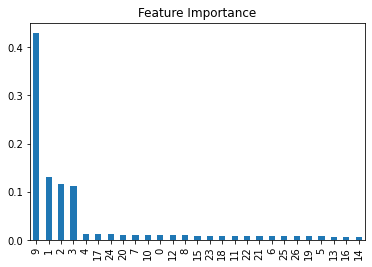

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X_train_pca, y)
coef = pd.Series(model.feature_importances_, X_train_pca.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.042328616860410694
RMSE: 0.20573919621795622
CV Score: 0.3071111424862884


<Axes: title={'center': 'Feature Importance'}>

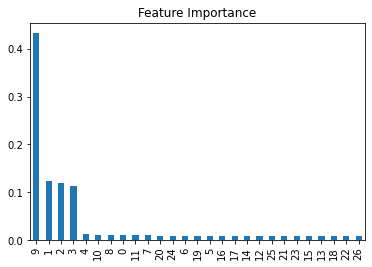

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X_train_pca, y)
coef = pd.Series(model.feature_importances_, X_train_pca.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [ ]:
max_depths = []
for i in range(100):
  max_depth = model.estimators_[i].tree_.max_depth
  max_depths.append(max_depth)

print('Average : ', np.mean(max_depths))
print('Max : ', max(max_depths))

Average :  36.33
Max :  43


Model Report
MSE: 1.043898164227153e-28
RMSE: 1.0217133473862192e-14
CV Score: 0.33962284362503986


<Axes: title={'center': 'Feature Importance'}>

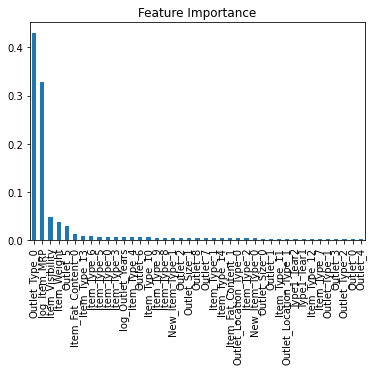

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X_norm, y)
coef = pd.Series(model.feature_importances_, X_norm.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

# GridSearchCV - RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_reg = RandomForestRegressor()
rf_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators':[100, 150, 200],
    #'rf_reg__max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[40,50,60]
}

In [ ]:
grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
# scoring=scoring

# Fit the grid search object to the data
grid_search.fit(X_norm, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50, 60],
                         'n_estimators': [100, 150, 200]},
             scoring='neg_mean_squared_error')

In [ ]:
model_name = 'RandomForestRegressor'

In [ ]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162827,0.345324,0.054423,0.002723,40,100,"{'max_depth': 40, 'n_estimators': 100}",-0.314246,-0.309066,-0.302230,-0.315046,-0.298153,-0.307748,0.006629,7
1,6.747074,0.878720,0.103024,0.043788,40,150,"{'max_depth': 40, 'n_estimators': 150}",-0.313533,-0.310455,-0.300191,-0.314877,-0.295670,-0.306945,0.007634,3
2,8.296183,0.277091,0.101024,0.002432,40,200,"{'max_depth': 40, 'n_estimators': 200}",-0.311067,-0.311271,-0.301036,-0.314598,-0.296637,-0.306922,0.006862,2
3,4.164578,0.338613,0.052331,0.001936,50,100,"{'max_depth': 50, 'n_estimators': 100}",-0.315763,-0.312828,-0.303123,-0.314199,-0.297429,-0.308668,0.007146,9
4,6.115156,0.081383,0.085149,0.007019,50,150,"{'max_depth': 50, 'n_estimators': 150}",-0.314761,-0.311592,-0.298255,-0.314028,-0.296722,-0.307072,0.007910,4
5,8.349357,0.294774,0.103041,0.008672,50,200,"{'max_depth': 50, 'n_estimators': 200}",-0.313928,-0.312135,-0.299541,-0.311906,-0.297057,-0.306913,0.007112,1
6,3.987000,0.280125,0.052162,0.001004,60,100,"{'max_depth': 60, 'n_estimators': 100}",-0.316425,-0.313091,-0.301564,-0.313701,-0.296646,-0.308286,0.007737,8
7,6.223615,0.371359,0.078388,0.002158,60,150,"{'max_depth': 60, 'n_estimators': 150}",-0.314303,-0.312354,-0.300032,-0.313864,-0.297340,-0.307579,0.007339,6
8,8.144933,0.289278,0.109588,0.010663,60,200,"{'max_depth': 60, 'n_estimators': 200}",-0.314506,-0.311160,-0.302377,-0.312685,-0.296873,-0.307520,0.006761,5


In [ ]:
# Get the best estimator from the grid search
best_estimator = grid_search.best_estimator_
print(best_estimator)

RandomForestRegressor(max_depth=50, n_estimators=200)
